# Load MNIST dataset

Keras makes loading the [MNIST](http://yann.lecun.com/exdb/mnist/) database of handwritten digits very easy

In [1]:
# train and test sets
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


## Dataset

In [2]:
print "The MNIST database contains %d training images and %d test images." % (len(X_train), len(X_test))
print "The images are %dx%d pixels." % (X_train.shape[1], X_train.shape[2])
print "Gray levels: [%d,%d]." % (X_train[0].min(),X_train[0].max())

The MNIST database contains 60000 training images and 10000 test images.
The images are 28x28 pixels.
Gray levels: [0,255].


## Visualization

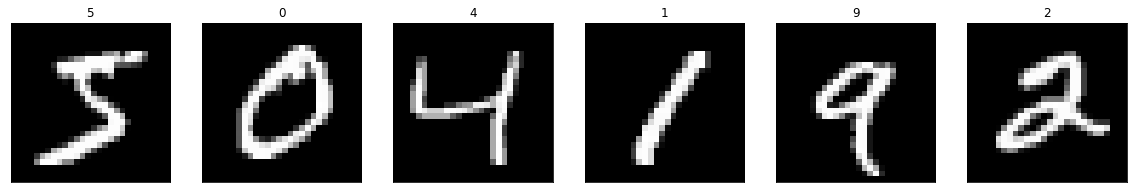

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# plot first six training images
fig = plt.figure(figsize = (20,20) )
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks = [], yticks = [])
    ax.imshow(X_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]) )

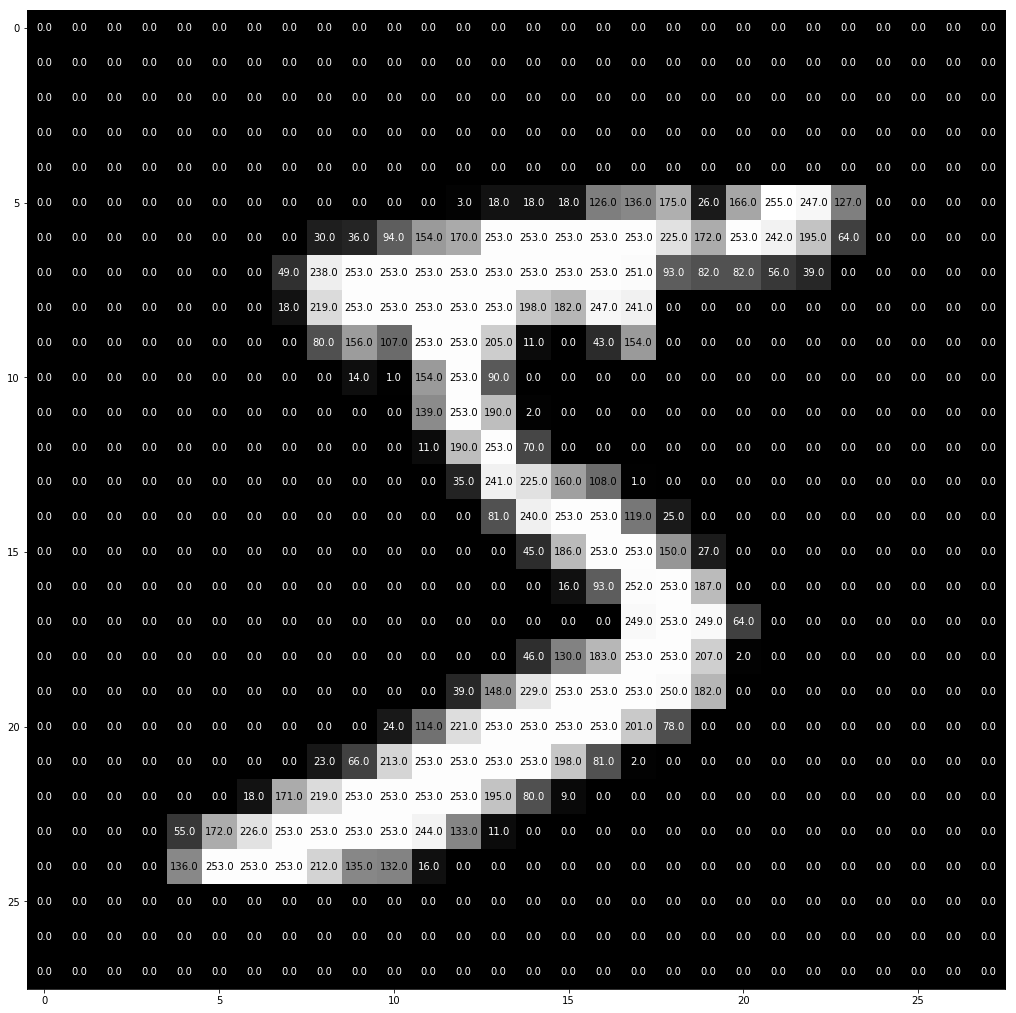

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap = 'gray')
    width, height = img.shape
    thresh = img.max()/2.55
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2) ), xy = (y,x), horizontalalignment = 'center',
                        verticalalignment = 'center', color = 'white' if img[x][y] < thresh else 'black')

fig = plt.figure(figsize = (18,18) )
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

# CNN
Great results can be achieved on the MNIST problem using convolutional neural networks (CNNs)

## Pre-process the data
We first rescale the images by dividing every pixel in every image by the number of gray level, i.e., 255. When using TensorFlow as backend, Keras CNNs require a 4D array as input, with shape:
$(nb, rows, columns, channels)$. You will also need to one hot encode the output class value, that Keras also provides a handy helper function to achieve: We also need to one hot encode the output class value. Once again Keras provides a handy function to achieve this.

In [5]:
# rescale: [0,255] to [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# reshape the images: width (28), height (28), channels (1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# one-hot encode the labels
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## Architecture
We develop below a very simple CNN.

The images are fed through a covolutional and max pooling layers. The convolutional layer expands the depth of the array from 1 to 32 using a 'relu' activation function. The max pooling layer squeezes out the spatial dimension by decreasing the features map from 26 to 13. A dropout layer is then added to minimize overfitting (20% rate). Finally, we flatten the final feature map to a 13x13x32 vector and use 2 fully connected layers. The last dense layer contains one node for each digit, i.e., 10 nodes. We use a 'softmax' activation function to get probabilities.

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='valid', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
